In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
run src/preprocessing.py

In [3]:
numeric_gelman_categorical_significant = pd.merge(numeric_log_gel_sc_out_rem_df, 
                                                  categorical_encoded_features_significant_variance_centered_out_rem,
                                                  left_index=True, right_index=True)

In [4]:
from sklearn.decomposition import PCA
pca_log_std_sc_out_rem = PCA()
pca_log_gel_sc_out_rem = PCA()
pca_num_gel_cat = PCA()

pca_log_std_sc_out_rem.fit(numeric_log_std_sc_out_rem_df)
pca_log_gel_sc_out_rem.fit(numeric_log_gel_sc_out_rem_df)
pca_num_gel_cat.fit(numeric_gelman_categorical_significant)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

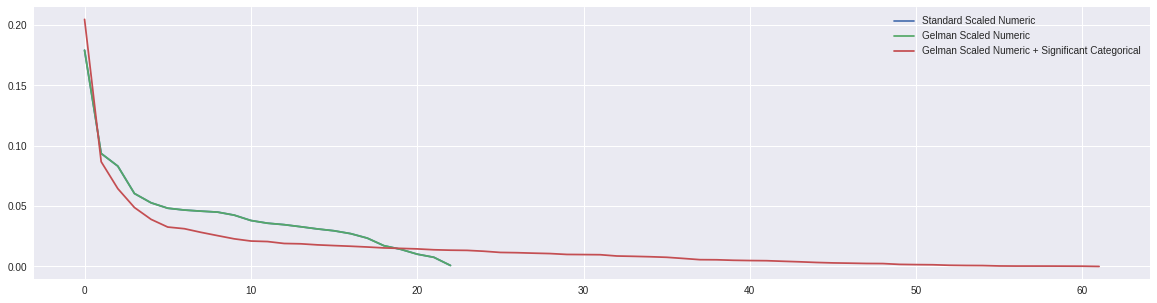

In [5]:
plt.figure(figsize=(20,5))
plt.plot(pca_log_std_sc_out_rem.explained_variance_ratio_, label='Standard Scaled Numeric')
plt.plot(pca_log_gel_sc_out_rem.explained_variance_ratio_, label='Gelman Scaled Numeric')
plt.plot(pca_num_gel_cat.explained_variance_ratio_, label='Gelman Scaled Numeric + Significant Categorical')
plt.legend()

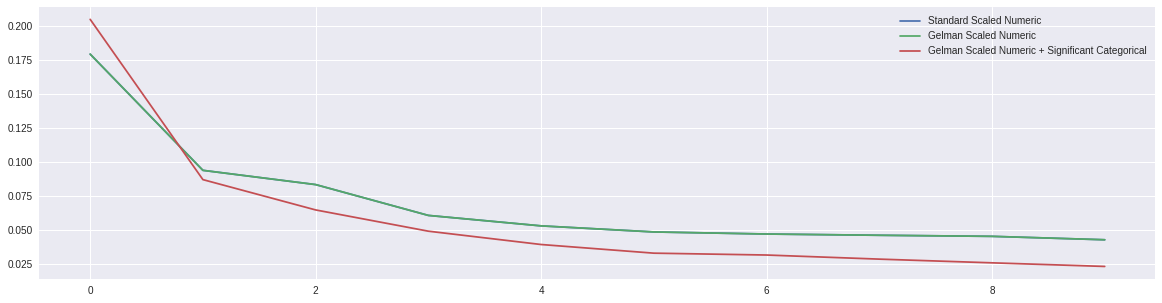

In [6]:
plt.figure(figsize=(20,5))
plt.plot(pca_log_std_sc_out_rem.explained_variance_ratio_[:10], label='Standard Scaled Numeric')
plt.plot(pca_log_gel_sc_out_rem.explained_variance_ratio_[:10], label='Gelman Scaled Numeric')
plt.plot(pca_num_gel_cat.explained_variance_ratio_[:10], label='Gelman Scaled Numeric + Significant Categorical')
plt.legend()

In [7]:
pca_log_std_sc_out_rem = PCA(8)
pca_log_gel_sc_out_rem = PCA(8)
pca_num_gel_cat = PCA(8)

pca_log_std_sc_out_rem.fit(numeric_log_std_sc_out_rem_df)
pca_log_gel_sc_out_rem.fit(numeric_log_gel_sc_out_rem_df)
pca_num_gel_cat.fit(numeric_gelman_categorical_significant)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
L_log_std_sc_out_rem = pca_log_std_sc_out_rem.explained_variance_ratio_
L_log_gel_sc_out_rem = pca_log_gel_sc_out_rem.explained_variance_ratio_
L_num_gel_cat = pca_num_gel_cat.explained_variance_ratio_

In [9]:
P_log_std_sc_out_rem = pd.DataFrame(pca_log_std_sc_out_rem.components_, columns=numeric_log_std_sc_out_rem_df.columns)
P_log_gel_sc_out_rem = pd.DataFrame(pca_log_gel_sc_out_rem.components_, columns=numeric_log_gel_sc_out_rem_df.columns)
P_num_gel_cat = pd.DataFrame(pca_num_gel_cat.components_, columns=numeric_gelman_categorical_significant.columns)

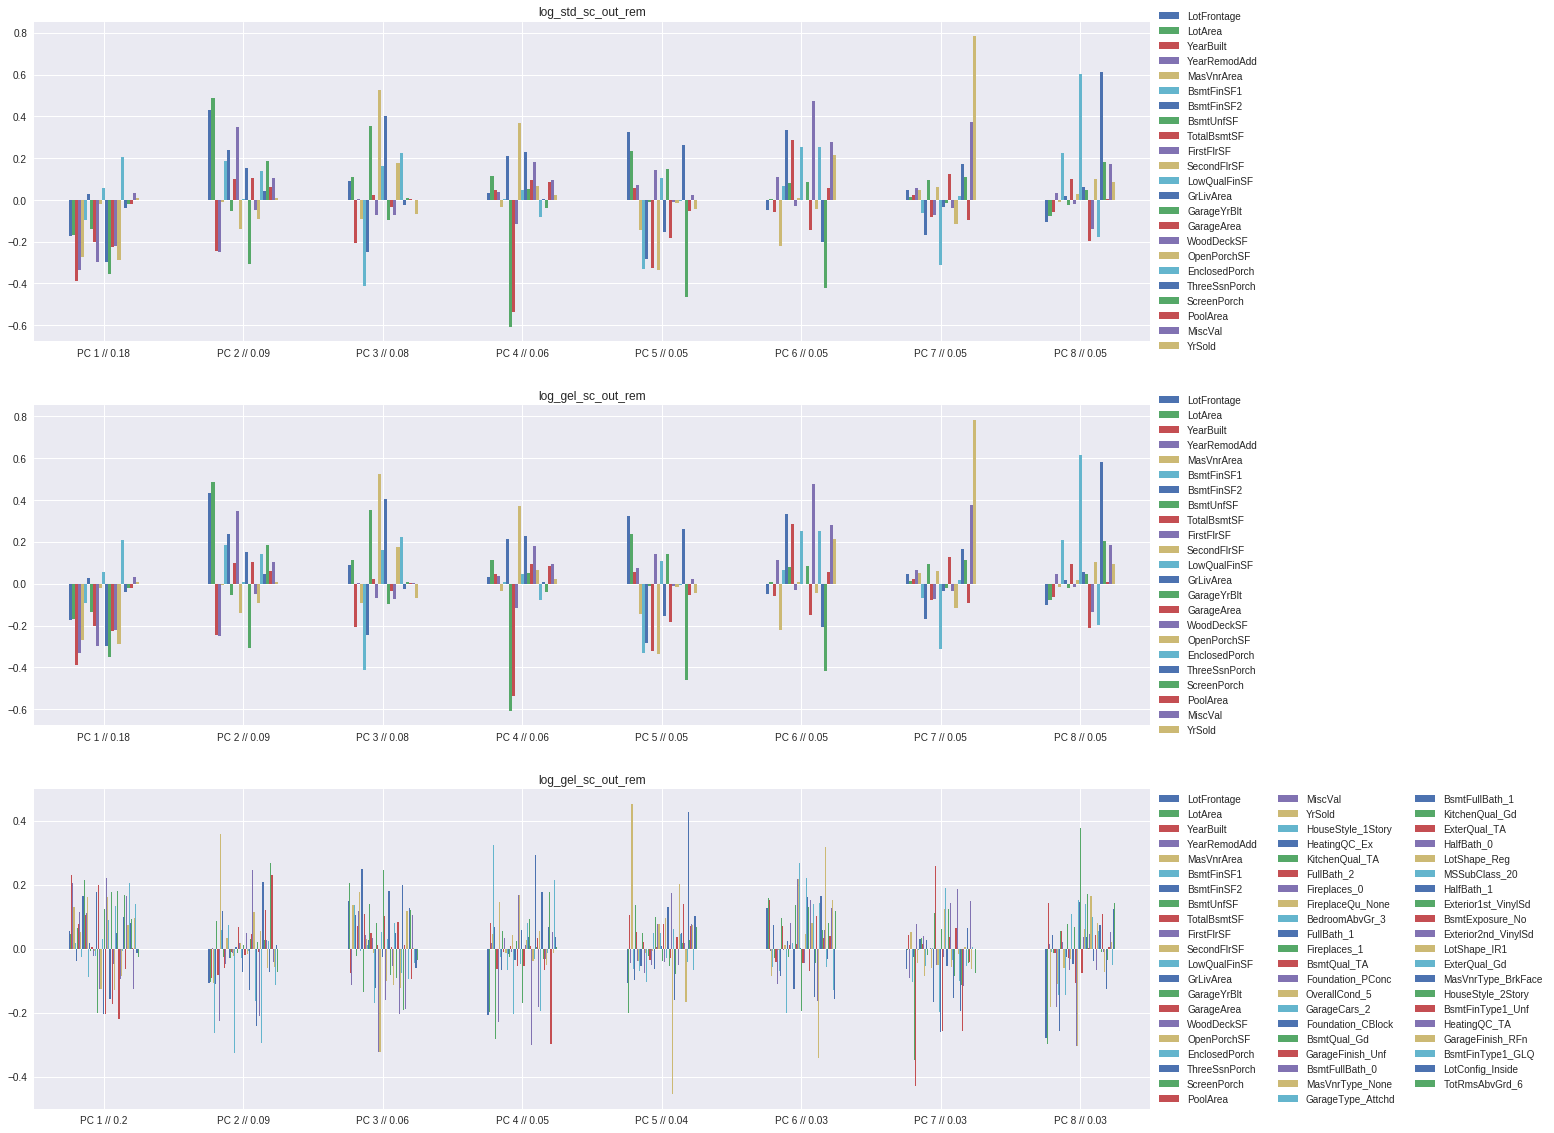

In [10]:
_, ax = plt.subplots(3,1,figsize=(20,20))
P_log_std_sc_out_rem.plot(kind='bar', rot=0, title="log_std_sc_out_rem", ax=ax[0]); 
P_log_gel_sc_out_rem.plot(kind='bar', rot=0, title="log_gel_sc_out_rem", ax=ax[1])
P_num_gel_cat.plot(kind='bar', rot=0, title="log_gel_sc_out_rem", ax=ax[2])

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), mode='expand')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), mode='expand')
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

ax[0].set_xticklabels(['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(L_log_std_sc_out_rem)])
ax[1].set_xticklabels(['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(L_log_gel_sc_out_rem)])
ax[2].set_xticklabels(['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(L_num_gel_cat)]);

In [ ]:
P_num_gel_cat_abs = P_num_gel_cat.abs()

def top_20_features_by_PC_abs(pc_num):
    PC_0_abs_sorted_index = P_num_gel_cat_abs.T.sort_values(pc_num, ascending=False).index
    PC_0_abs_sorted_index
    return P_num_gel_cat[PC_0_abs_sorted_index].T[pc_num].head(20)

In [ ]:
top_20_features_by_PC_abs(0)

In [ ]:
top_20_features_by_PC_abs(1)

In [ ]:
top_20_features_by_PC_abs(2)

In [ ]:
numeric_log_std_sc_out_rem_pca_df = pd.DataFrame(pca_log_std_sc_out_rem.transform(numeric_log_std_sc_out_rem_df),
                                                 columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8'])
numeric_gelman_categorical_significant_pca = pd.DataFrame(pca_num_gel_cat.transform(numeric_gelman_categorical_significant),
                                                 columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8'])